In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download -d dansbecker/melbourne-housing-snapshot

Dataset URL: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
License(s): CC-BY-NC-SA-4.0
melbourne-housing-snapshot.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

with zipfile.ZipFile("melbourne-housing-snapshot.zip", "r") as zip_ref:
    zip_ref.extractall("melbourne_data")


In [2]:
df = pd.read_csv("melbourne_data/melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10185 entries, 11958 to 7270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10185 non-null  object 
 1   Address        10185 non-null  object 
 2   Rooms          10185 non-null  int64  
 3   Type           10185 non-null  object 
 4   Price          10185 non-null  float64
 5   Method         10185 non-null  object 
 6   SellerG        10185 non-null  object 
 7   Date           10185 non-null  object 
 8   Distance       10185 non-null  float64
 9   Postcode       10185 non-null  float64
 10  Bedroom2       10185 non-null  float64
 11  Bathroom       10185 non-null  float64
 12  Car            10139 non-null  float64
 13  Landsize       10185 non-null  float64
 14  BuildingArea   5358 non-null   float64
 15  YearBuilt      6151 non-null   float64
 16  CouncilArea    9153 non-null   object 
 17  Lattitude      10185 non-null  float64
 18  Longtitu

In [15]:
#Geographical Plots

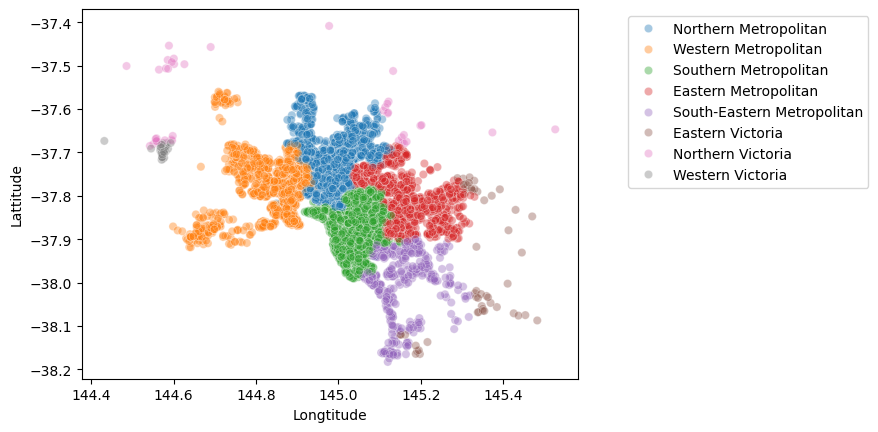

In [25]:
sns.scatterplot(df,x="Longtitude", y="Lattitude", alpha= 0.4, hue="Regionname")
plt.legend( bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))

Text(0.5, 1.0, 'Melbourne Housing Prices by Location')

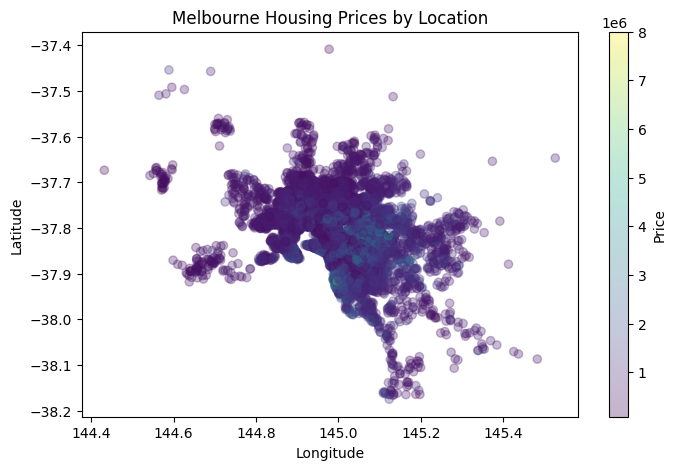

In [39]:
plt.figure(figsize=(8,5))
scatter = plt.scatter(data=train, x='Longtitude', y='Lattitude', 
                      c=train['Price'], cmap='viridis', alpha=0.3)
plt.colorbar(scatter, label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Melbourne Housing Prices by Location')

<Axes: xlabel='Longtitude', ylabel='Lattitude'>

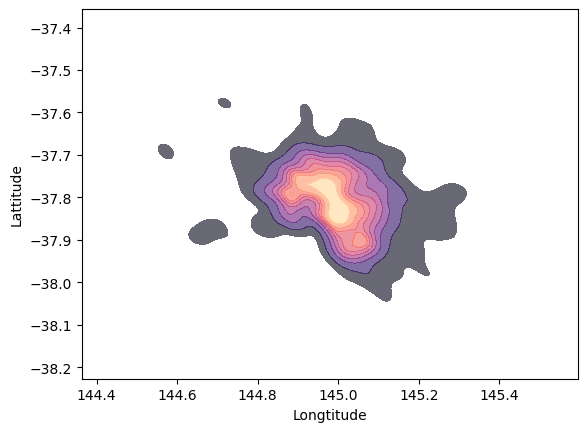

In [40]:
sns.kdeplot(data=train, x='Longtitude', y='Lattitude', cmap="magma", fill=True, alpha=0.6)


In [41]:
train['Suburb'].value_counts()

Suburb
Reservoir         243
Richmond          174
Bentleigh East    172
Preston           158
Brunswick         154
                 ... 
Seabrook            1
Sandhurst           1
Bacchus Marsh       1
Montrose            1
Hurstbridge         1
Name: count, Length: 305, dtype: int64

In [45]:
train['SellerG'].value_counts()

SellerG
Nelson           1026
Jellis            903
hockingstuart     778
Barry             671
Ray               477
                 ... 
Clairmont           1
Appleby             1
Weast               1
Dixon               1
Prowse              1
Name: count, Length: 234, dtype: int64

In [5]:
train.drop(['Address','Suburb','SellerG'], axis=1, inplace= True)
test.drop(['Address','Suburb','SellerG'], axis=1, inplace= True)

In [6]:
train['Year'] = pd.to_datetime(train['Date'], dayfirst=True).dt.year
test['Year'] = pd.to_datetime(test['Date'], dayfirst=True).dt.year

In [11]:
train['Method'].nunique()

5

In [54]:
train['Type'].nunique()

3

In [14]:
train.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                46
Landsize            0
BuildingArea     4827
YearBuilt        4034
CouncilArea      1032
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Year                0
dtype: int64

In [15]:
test.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                16
Landsize            0
BuildingArea     1623
YearBuilt        1341
CouncilArea       337
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Year                0
dtype: int64

In [8]:
train['Car'].value_counts()

Car
2.0     4194
1.0     4130
0.0      781
3.0      551
4.0      374
5.0       50
6.0       44
7.0        7
8.0        5
10.0       3
Name: count, dtype: int64

In [8]:
train.corr(numeric_only=True)['Car'].sort_values(ascending= False)

Car              1.000000
Rooms            0.412070
Bedroom2         0.407030
Bathroom         0.328188
Distance         0.271418
Price            0.232516
YearBuilt        0.121475
BuildingArea     0.096325
Landsize         0.089352
Year             0.079587
Longtitude       0.066463
Postcode         0.054777
Lattitude       -0.013165
Propertycount   -0.024318
Name: Car, dtype: float64

In [7]:
grouped_by_room = train.groupby('Rooms')['Car'].mean()

In [8]:
def fill_car(room, car):
    if np.isnan(car):
        return grouped_by_room[room]
    else:
        return car

In [9]:
train['Car'] = train.apply(lambda t: fill_car(t['Rooms'], t['Car']), axis =1)

In [10]:
test['Car'] = test.apply(lambda t: fill_car(t['Rooms'], t['Car']), axis =1)

In [14]:
train.isna().sum()

Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     4827
YearBuilt        4034
CouncilArea      1032
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Year                0
dtype: int64

In [34]:
train.corr(numeric_only=True)['BuildingArea'].sort_values(ascending= False)

BuildingArea     1.000000
Landsize         0.542816
Rooms            0.114443
Bedroom2         0.113142
Distance         0.108006
Bathroom         0.102100
Car              0.096383
Price            0.078819
Postcode         0.059504
Lattitude        0.050953
YearBuilt        0.020700
Year             0.017416
Propertycount   -0.030796
Longtitude      -0.032515
Name: BuildingArea, dtype: float64

In [11]:
corr = train.corr(numeric_only=True)

In [18]:
train['Landsize'].describe()

count    10185.000000
mean       523.030339
std       1396.720204
min          0.000000
25%        175.000000
50%        435.000000
75%        652.000000
max      75100.000000
Name: Landsize, dtype: float64

In [17]:
train['Landsize'].sort_values(ascending= False)[:10]

687      75100.0
13245    44500.0
5194     41400.0
11371    40468.0
3942     37000.0
9223     37000.0
12504    20200.0
5694     17200.0
12163    17200.0
8379     17200.0
Name: Landsize, dtype: float64

In [12]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000, 10000, 40000]
labels = range(len(bins) - 1)
arr = []
for i in labels:
    arr.append(train[train['Landsize'] < bins[i+1]]['BuildingArea'].mean())

In [30]:
labels

range(0, 13)

In [14]:
arr.append(train[train['Landsize'] > 40000]['BuildingArea'].mean())

In [15]:
arr

[86.20718415417558,
 96.101062771908,
 106.60977654603757,
 114.04060213323353,
 119.95238463295267,
 128.64019015599786,
 137.15632838172405,
 143.33466714667762,
 145.01832412490054,
 145.8321215207193,
 146.65132378185908,
 146.4793351467564,
 146.40124392383797,
 44515.0]

In [16]:
def fill_building(land,building):
    if np.isnan(building):
        for i in labels:
            if (land < bins[i+1]):
                return arr[i]
    else:
        return building

In [17]:
train['BuildingArea'] = train.apply(lambda t: fill_building(t['Landsize'], t['BuildingArea']), axis =1)
test['BuildingArea'] = test.apply(lambda t: fill_building(t['Landsize'], t['BuildingArea']), axis =1)

In [18]:
train['BuildingArea'].dropna(inplace= True) #3 outliers of landslide > 40000 with NaN Building Area

In [19]:
test['BuildingArea'].dropna(inplace= True) #2 over here

In [40]:
corr['YearBuilt'].sort_values(ascending= False)

YearBuilt        1.000000
Distance         0.249379
Bathroom         0.163145
Car              0.121106
Year             0.104591
Lattitude        0.051387
Postcode         0.041385
Landsize         0.034354
BuildingArea     0.008473
Propertycount    0.004374
Longtitude      -0.005094
Bedroom2        -0.048093
Rooms           -0.061012
Price           -0.329463
Name: YearBuilt, dtype: float64

In [20]:
grouped_by_dist= train.groupby('Distance')['YearBuilt'].mean().dropna()

In [21]:
def fill_yearBuilt(dist, year):
    if np.isnan(year):
        return grouped_by_dist(dist)
    else:
        return year

In [20]:
train['YearBuilt'] = train.apply(lambda t: fill_building(t['Distance'], t['YearBuilt']), axis =1)
test['YearBuilt'] = test.apply(lambda t: fill_building(t['Distance'], t['YearBuilt']), axis =1)

In [23]:
train['YearBuilt'].dropna(inplace= True)
test['YearBuilt'].dropna(inplace= True)

In [21]:
mean_prices= train.groupby('CouncilArea')['Price'].mean()
labels = pd.qcut(mean_prices, q=4, labels=[0, 1, 2, 3])
train['CouncilArea_PriceLabel'] = train['CouncilArea'].map(labels.astype(int))

In [22]:
train['CouncilArea_PriceLabel'].fillna(4, inplace= True)

C:\Users\Taif Al Ghazali\AppData\Local\Temp\ipykernel_31472\3265087331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['CouncilArea_PriceLabel'].fillna(4, inplace= True)


In [41]:
train.groupby('CouncilArea')['Price'].mean() 

CouncilArea
Banyule              9.453988e+05
Bayside              1.632557e+06
Boroondara           1.624317e+06
Brimbank             6.472814e+05
Cardinia             5.689000e+05
Casey                6.622344e+05
Darebin              9.155219e+05
Frankston            6.434500e+05
Glen Eira            1.053945e+06
Greater Dandenong    7.142439e+05
Hobsons Bay          9.971468e+05
Hume                 5.598937e+05
Kingston             9.832063e+05
Knox                 9.079045e+05
Macedon Ranges       6.250000e+05
Manningham           1.213141e+06
Maribyrnong          8.087232e+05
Maroondah            8.373561e+05
Melbourne            9.174369e+05
Melton               5.162275e+05
Monash               1.189119e+06
Moonee Valley        9.858288e+05
Moorabool            2.850000e+05
Moreland             8.320103e+05
Nillumbik            8.504600e+05
Port Phillip         1.132945e+06
Stonnington          1.316878e+06
Unavailable          1.325000e+06
Whitehorse           1.219769e+06
Wh

In [23]:
test['CouncilArea_PriceLabel'] = test['CouncilArea'].map(labels.astype(int))

In [25]:
test['CouncilArea_PriceLabel'].fillna(4, inplace= True)

C:\Users\Taif Al Ghazali\AppData\Local\Temp\ipykernel_31472\3795917094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['CouncilArea_PriceLabel'].fillna(4, inplace= True)


In [29]:
test.isna().sum()

Rooms                     0
Type                      0
Price                     0
Method                    0
Date                      0
Distance                  0
Postcode                  0
Bedroom2                  0
Bathroom                  0
Car                       0
Landsize                  0
BuildingArea              0
YearBuilt                 0
Lattitude                 0
Longtitude                0
Regionname                0
Propertycount             0
Year                      0
CouncilArea_PriceLabel    0
dtype: int64

In [27]:
train.drop('CouncilArea', axis=1, inplace= True)
test.drop('CouncilArea', axis=1, inplace= True)

In [28]:
train.dropna(subset = ['BuildingArea'], inplace=True)
test.dropna(subset = ['BuildingArea'], inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10182 entries, 11958 to 7270
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rooms                   10182 non-null  int64  
 1   Type                    10182 non-null  object 
 2   Price                   10182 non-null  float64
 3   Method                  10182 non-null  object 
 4   Date                    10182 non-null  object 
 5   Distance                10182 non-null  float64
 6   Postcode                10182 non-null  float64
 7   Bedroom2                10182 non-null  float64
 8   Bathroom                10182 non-null  float64
 9   Car                     10182 non-null  float64
 10  Landsize                10182 non-null  float64
 11  BuildingArea            10182 non-null  float64
 12  YearBuilt               10182 non-null  float64
 13  Lattitude               10182 non-null  float64
 14  Longtitude              10182 non-null  

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3393 entries, 1061 to 9592
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rooms                   3393 non-null   int64  
 1   Type                    3393 non-null   object 
 2   Price                   3393 non-null   float64
 3   Method                  3393 non-null   object 
 4   Date                    3393 non-null   object 
 5   Distance                3393 non-null   float64
 6   Postcode                3393 non-null   float64
 7   Bedroom2                3393 non-null   float64
 8   Bathroom                3393 non-null   float64
 9   Car                     3393 non-null   float64
 10  Landsize                3393 non-null   float64
 11  BuildingArea            3393 non-null   float64
 12  YearBuilt               3393 non-null   float64
 13  Lattitude               3393 non-null   float64
 14  Longtitude              3393 non-null   fl

In [32]:
train.dropna(subset = ['Date'], inplace=True)
test.dropna(subset = ['Date'], inplace=True)

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
train['Type']

11958    h
5667     u
12263    t
12809    h
3219     u
        ..
5191     h
13418    h
5390     t
860      h
7270     h
Name: Type, Length: 10182, dtype: object

In [36]:
cat_encoder1 = OneHotEncoder()
type_train = cat_encoder1.fit_transform(train[['Type']])
type_test = cat_encoder1.transform(test[['Type']])

In [38]:
type_train.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [39]:
cat_encoder2 = OneHotEncoder()
method_train = cat_encoder2.fit_transform(train[['Method']])
method_test = cat_encoder2.transform(test[['Method']])

In [40]:
cat_encoder3 = OneHotEncoder()
region_train = cat_encoder3.fit_transform(train[['Regionname']])
region_test = cat_encoder3.transform(test[['Regionname']])

In [41]:
train_encoded = np.hstack([type_train.toarray(), method_train.toarray(), region_train.toarray()])
test_encoded = np.hstack([type_test.toarray(), method_test.toarray(), region_test.toarray()])

In [44]:
train_final = pd.concat([train.drop(['Type', 'Method', 'Regionname'], axis=1),
                         pd.DataFrame(train_encoded, index=train.index)], axis=1)

test_final = pd.concat([test.drop(['Type', 'Method', 'Regionname'], axis=1),
                        pd.DataFrame(test_encoded, index=test.index)], axis=1)

In [46]:
train_final.drop('Date', axis=1, inplace= True)
test_final.drop('Date', axis=1, inplace= True)

In [49]:
X_train = train_final.drop('Price', axis=1)
y_train = train_final['Price']

X_test = test_final.drop('Price', axis=1)
y_test = test_final['Price']

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10182 entries, 11958 to 7270
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rooms                   10182 non-null  int64  
 1   Distance                10182 non-null  float64
 2   Postcode                10182 non-null  float64
 3   Bedroom2                10182 non-null  float64
 4   Bathroom                10182 non-null  float64
 5   Car                     10182 non-null  float64
 6   Landsize                10182 non-null  float64
 7   BuildingArea            10182 non-null  float64
 8   YearBuilt               10182 non-null  float64
 9   Lattitude               10182 non-null  float64
 10  Longtitude              10182 non-null  float64
 11  Propertycount           10182 non-null  float64
 12  Year                    10182 non-null  int32  
 13  CouncilArea_PriceLabel  10182 non-null  float64
 14  0                       10182 non-null  

In [52]:
X_train.columns = X_train.columns.astype(str)
X_test.columns= X_test.columns.astype(str)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [56]:
reg.fit(X_train, y_train)

LinearRegression()

In [57]:
predictions= reg.predict(X_test)

In [60]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, predictions)

In [61]:
rmse / df['Price'].mean()

0.35724181237031855